## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from itables import show


## Load Data

In [74]:
df_diary = pd.read_stata('./data/data4diarynew_ITA.dta')
df_td = pd.read_stata('./data/td_ita.dta')
df_step = pd.read_csv('./data/stepdetectorevent.csv')

In [75]:
df_step.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4422605 entries, 0 to 4422604
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   experimentid  object
 1   userid        int64 
 2   day           int64 
 3   timestamp     int64 
dtypes: int64(3), object(1)
memory usage: 135.0+ MB


In [76]:
df = pd.DataFrame(columns=['id','A3c', 'date'], data=df_td[['id','A3c', 'date_not']].copy())


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268474 entries, 0 to 268473
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      268474 non-null  float32
 1   A3c     268474 non-null  object 
 2   date    0 non-null       float64
dtypes: float32(1), float64(1), object(1)
memory usage: 5.1+ MB


In [78]:
df_td.columns.to_list()

['pilot',
 'id',
 'date_not',
 'datein_ques',
 'datein_answ',
 'first2w',
 'week',
 'YY_not',
 'MM_not',
 'DD_not',
 'hh_not',
 'mm_not',
 'tag_td',
 'what',
 'travel_fromto',
 'travel_medium',
 'sport',
 'A3c',
 'where',
 'withw',
 'mood',
 'tdtot',
 'delta_td',
 'answerduration_td',
 'tag_mo',
 'sleep',
 'expectday',
 'motot',
 'delta_mo',
 'answerduration_mo',
 'tag_ev',
 'howwasday',
 'uniproblem',
 'evtot',
 'delta_ev',
 'answerduration_ev',
 'tag_sn',
 'A6b',
 'A6c',
 'sntot',
 'delta_sn',
 'answerduration_sn',
 'tm',
 'what1',
 'what2',
 'where2',
 'withw2',
 'c3mis',
 'c3_1',
 'c3_2',
 'c3_3',
 'c3_4',
 'c3_5',
 'c3_6',
 'c3_7',
 'c3_8',
 'c3_9',
 'c3_10',
 'c3_11',
 'c3_12',
 'c3_13',
 'c3_14',
 'c3_15',
 'c3_16',
 'c3_17',
 'c3_18',
 'c3_19',
 'c3_20',
 'b6mis',
 'b6_1',
 'b6_2',
 'b6_3',
 'b6_4',
 'b6_5',
 'c6mis',
 'c6_1',
 'c6_2',
 'c6_3',
 'c6_4',
 'c6_5',
 'c6_6',
 'c6_7',
 'c6_8',
 'c6_9',
 'c6_10',
 'c6_11',
 'c6_12',
 'c6_13',
 'c6_14',
 'c6_15',
 'c6_16',
 'c6_17',
 

In [79]:
df_td.pilot.unique()

['wenetItaly']
Categories (1, object): ['wenetItaly']

In [80]:
df_td['date_not'] = pd.to_datetime(df_td['date_not'])
df_td['date'] = df_td['date_not'].dt.day_name()


In [81]:
df_td.head(10)

,pilot,id,date_not,datein_ques,datein_answ,first2w,week,YY_not,MM_not,DD_not,...,c6_18,c6_19,c6_20,c6_21,c6_22,c6_23,c6_24,c6_25,c6_26,date
0,wenetItaly,0.0,2020-11-13 00:00:00,2020-11-13 00:00:00,2020-11-13 00:00:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
1,wenetItaly,0.0,2020-11-13 00:30:00,2020-11-13 00:30:00,2020-11-13 00:30:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
2,wenetItaly,0.0,2020-11-13 01:00:00,2020-11-13 01:00:00,2020-11-13 01:00:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
3,wenetItaly,0.0,2020-11-13 01:30:00,2020-11-13 01:30:00,2020-11-13 01:30:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
4,wenetItaly,0.0,2020-11-13 02:00:00,2020-11-13 02:00:00,2020-11-13 02:00:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
5,wenetItaly,0.0,2020-11-13 02:30:00,2020-11-13 02:30:00,2020-11-13 02:30:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
6,wenetItaly,0.0,2020-11-13 03:00:00,2020-11-13 03:00:00,2020-11-13 03:00:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
7,wenetItaly,0.0,2020-11-13 03:30:00,2020-11-13 03:30:00,2020-11-13 03:30:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
8,wenetItaly,0.0,2020-11-13 04:00:00,2020-11-13 04:00:00,2020-11-13 04:00:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
9,wenetItaly,0.0,2020-11-13 04:30:00,2020-11-13 04:30:00,2020-11-13 04:30:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday


In [82]:
df_diary.columns

Index(['token', 'w1_idpilot', 'userid', 'pilot', 'w1_A01', 'nationality',
       'department', 'Dep_UNITN', 'cohort', 'degree', 'Extraversion',
       'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness',
       'MExtraversion', 'MAgreeableness', 'MConscientiousness', 'MNeuroticism',
       'MOpenness', 'Pconformity', 'Ptradition', 'Pbenov', 'Punivers', 'Pself',
       'Pstim', 'Phedon', 'Pachieve', 'Ppower', 'Psecurity', 'Popen',
       'Pselfenh', 'Pselftran', 'Pconserv', 'Mconformity', 'Mtradition',
       'Mbenov', 'Munivers', 'Mself', 'Mstim', 'Mhedon', 'Machieve', 'Mpower',
       'Msecurity', 'Mopen', 'Mselfenh', 'Mselftran', 'Mconserv',
       'Pexcitements', 'Psuprapersonal', 'Pinteractive', 'Ppromotion',
       'Pexistence', 'Pnormative', 'Linguistic', 'Logicmath', 'Spatial',
       'Bodykines', 'Musical', 'Interpersonal', 'Intrapersonal',
       'Environmental', 'Spiritual', 'w1_A03', 'w1_A04UNITN', 'w1_A09UNITN',
       'w1_A10UNITN'],
      dtype='object')

In [83]:
df_diary['w1_A03'].value_counts()

w1_A03
Italian      239
Ethiopian      2
Romanian       2
Honduran       1
Kazakh         1
Moldovan       1
Pakistani      1
Pole           1
Turkish        1
Name: count, dtype: int64

In [84]:
# # For Exploration purpose (set the max display options)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Data Selection based on participation duration

In [85]:
df_td.date_not = pd.to_datetime(df_td.date_not)
df_td['date'] = df_td.date_not.dt.date

In [86]:
# statistical description of the responded notification
df_td[['tdtot','motot','sntot']].describe()

,tdtot,motot,sntot
count,268474.000000,6989.000000,69890.000000
mean,756.464730,17.630705,232.842324
std,357.110327,10.371090,88.465878
min,2.000000,0.000000,0.000000
25%,473.000000,7.000000,229.000000
50%,921.000000,23.000000,282.000000
75%,1061.000000,27.000000,285.000000
max,1092.000000,28.000000,285.000000


In [87]:
# Option 1 - we can use the 75th percentile as the threshold, this gives 156 users
df_td.query("tdtot >= 473.0 and sntot>=229.0").id.nunique()

156

In [88]:
# Option 2 - we can review the values and select more inclusive threshold
df_resp = df_td[['id','first2w','date','tdtot','sntot','motot']].drop_duplicates()


In [89]:
df_sum = df_resp.groupby(['id'])[['sntot','motot']].sum().reset_index()

df_sum['total'] = df_sum['sntot']+ df_sum['motot']

df_sum['id'] = df_sum['id'].astype(int)
df_sum.sort_values('total', ascending=False, inplace=True)
df_sum.reset_index(drop=True, inplace=True)
    
df_sum.describe()

,id,sntot,motot,total
count,241.000000,241.000000,241.000000,241.000000
mean,132.647303,6752.427386,511.290456,7263.717842
std,77.538190,2570.831332,301.365985,2735.891720
min,0.000000,0.000000,0.000000,0.000000
25%,66.000000,6641.000000,203.000000,7163.000000
50%,130.000000,8178.000000,667.000000,8613.000000
75%,201.000000,8265.000000,783.000000,9019.000000
max,266.000000,8265.000000,812.000000,9077.000000


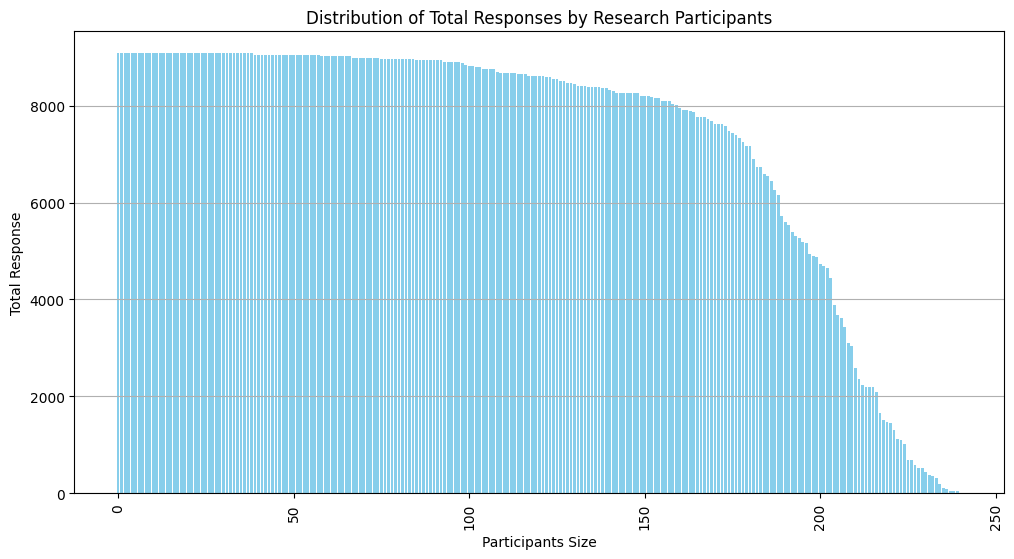

In [90]:
# Plotting the distribution of total responses by research participants
plt.figure(figsize=(12, 6))
plt.bar(x = df_sum.index, height=df_sum['total'], color='skyblue')
plt.title('Distribution of Total Responses by Research Participants')
plt.xlabel('Participants Size')
plt.ylabel('Total Response')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(axis='y')
plt.show()

In [91]:
id_204= df_sum[df_sum['total']>=df_sum['total'].max()*0.6].id.unique()
df_sum[df_sum.id.isin(id_204)].id.nunique()

192

In [92]:
df_sampled_td = df_td[df_td.id.isin(id_204)].copy()

## Change the datetime counting

In [93]:
# Shift the times by 5 hours to create a "social datetime"
df_sampled_td['social_date'] = df_sampled_td.date_not + pd.Timedelta(hours=-5)


In [94]:
df_sampled_td[['social_date', 'date_not']].head(20)

,social_date,date_not
0,2020-11-12 19:00:00,2020-11-13 00:00:00
1,2020-11-12 19:30:00,2020-11-13 00:30:00
2,2020-11-12 20:00:00,2020-11-13 01:00:00
3,2020-11-12 20:30:00,2020-11-13 01:30:00
4,2020-11-12 21:00:00,2020-11-13 02:00:00
5,2020-11-12 21:30:00,2020-11-13 02:30:00
6,2020-11-12 22:00:00,2020-11-13 03:00:00
7,2020-11-12 22:30:00,2020-11-13 03:30:00
8,2020-11-12 23:00:00,2020-11-13 04:00:00
9,2020-11-12 23:30:00,2020-11-13 04:30:00


## Map the Fooodtypes to nutrient compositions

In [95]:
mapping_cols = pd.read_excel('./data/foodNutrientCompositionMapping_Sheet.xlsx')

In [96]:
mapping_cols.dropna(subset=['Doc_ID'], inplace=True)
mapping_cols.rename(columns = {'Energy(Kcal)':'energy_gain',
       'Water(g)':'water_gain', 'Protein, total(g)':'protein_gain', 'Fat (g)': 'fat_gain',
       'Carbohydrate, available; calculated by difference\n(g)': 'carb_gain',
       'Fibre, total dietary \n(g)':'fibre_gain', 'Alcohol\n(g)':'alcohol', 'Ash\n(g)':'ash',
       'Calcium\n(mg)':'calcium', 'Iron\n(mg)':'iron', 'Magnesium\n(mg)':'magnesium', 'Phosphorus\n(mg)':'phosphorus',
       'Potassium\n(mg)':'potassium', 'Zinc\n(mg)': 'zinc',
       'Vitamin A (expressed in retinol activity equivalents)\n(mcg)':'vitamin_A',
       'Vitamin A (expressed in retinol equivalents)\n(mcg)':'vitamin_B', 'Retinol\n(mcg)':'retinol',
       'Beta-carotene equivalents\n(mcg)':'carotene', 'Thiamin\n(vitamin B1)\n(mg)': 'thiamin',
       'Riboflavin (vitamin B2)\n(mg)':'riboflavin', 'Vitamin C\n(mg)': 'vitamin_C' }, inplace=True)

In [97]:
mapping_cols

,Object Name,Name,Code,source,Doc_ID,energy_gain,water_gain,protein_gain,fat_gain,carb_gain,...,phosphorus,potassium,zinc,vitamin_A,vitamin_B,retinol,carotene,thiamin,riboflavin,vitamin_C
2,"Bread, steamed buns and/or breakfast cereals",NaN,NaN,"SUA, avg",c3_1,320.500000,18.750000,9.450000,2.950000,60.850000,...,199.500000,218.000000,1.565000,2.500000,2.500000,2.000000,2.000000,0.175000,0.085000,0.000000
7,"Rice, potatoes, beans, pasta, noodles, dumplin...",NaN,NaN,"SUA, avg",c3_2,272.250000,28.200000,10.750000,1.375000,50.775000,...,208.250000,579.500000,1.545000,0.500000,1.250000,0.250000,4.250000,0.262500,0.282500,4.750000
8,Vegetables,Homogenized vegetable preparations,23991.02,"SUA, avg",c3_3,41.000000,88.800000,1.500000,0.400000,6.900000,...,31.000000,164.000000,0.230000,176.000000,351.000000,2.000000,2094.000000,0.030000,0.050000,4.000000
20,Fruits,NaN,NaN,"SUA, avg",c3_4,55.363636,84.972727,0.818182,0.245455,11.372727,...,18.818182,176.000000,0.139091,7.909091,16.090909,0.000000,96.000000,0.035455,0.026364,20.181818
25,Meat,NaN,NaN,"SUA, avg",c3_5,197.000000,63.475000,21.775000,11.975000,0.500000,...,184.000000,290.000000,3.520000,4.500000,5.000000,4.250000,3.500000,0.062500,0.165000,0.000000
33,Fish,NaN,NaN,"SUA, avg",c3_6,147.142857,70.442857,20.014286,7.357143,0.257143,...,251.714286,332.142857,0.835714,120.571429,120.857143,120.285714,4.285714,0.118571,0.138571,0.857143
36,"Processed Meat(ham, bacon, sausages)",NaN,NaN,"SUA, avg",c3_7,303.000000,53.750000,14.600000,25.850000,2.750000,...,177.500000,232.000000,2.175000,109.500000,112.000000,107.500000,28.000000,0.160000,0.185000,3.500000
37,"Dairy products (Plain or low-fat milk, yoghurt...",Dairy products n.e.c.,22290,SUA,c3_8,52.000000,88.900000,3.600000,2.100000,4.700000,...,99.000000,157.000000,0.470000,73.000000,73.000000,72.000000,8.000000,0.040000,0.170000,1.000000
43,"Soya-based food (milk, yoghurt, tofu)",NaN,NaN,"SUA, avg",c3_9,332.000000,41.120000,12.620000,26.360000,8.640000,...,193.800000,537.400000,1.586000,0.800000,1.800000,0.000000,10.000000,0.202000,0.166000,0.200000
44,Pastries and sweets,Pastry,F0022,SUA,c3_10,392.000000,18.300000,6.500000,14.800000,57.500000,...,144.000000,139.000000,0.550000,49.000000,51.000000,47.000000,26.000000,0.140000,0.120000,1.000000


In [98]:
food_nutrients = ['energy_gain',
       'water_gain', 'protein_gain', 'fat_gain', 'carb_gain', 'fibre_gain',
       'alcohol', 'ash', 'calcium', 'iron',
       'magnesium', 'phosphorus', 'potassium',
       'zinc', 'vitamin_A', 'vitamin_B', 'retinol',
       'carotene', 'thiamin', 'riboflavin',
       'vitamin_C']
mapping_cols[food_nutrients].fillna(0, inplace=True)
cols = food_nutrients.copy()
cols.append('Doc_ID')

mapping_set = mapping_cols[cols].dropna(axis=0, subset=food_nutrients, how='all')

In [99]:

def preprocess_and_sum(df_sampled_td, mapping_set, search_columns, mapping_id, nutrient_columns):
    # Prepare a copy of the DataFrame to store results
    results = df_sampled_td.copy()

    for search_column in search_columns:
        # Explode the item_ids in each column
        str_var = df_sampled_td[search_column].str.replace(' ', '')
        if str_var.empty:
            continue
        expanded_df = (str_var.str.split(',').explode().dropna().reset_index()
                )
        
        # Create token prefix
        token = 'c3_' if search_column == 'A3c' else 'c6_'
        expanded_df[mapping_id] = token + expanded_df[search_column].astype(str)

        # Merge exploded values with mapping_set on 'Doc_ID'
        merged = expanded_df.merge(mapping_set, on=mapping_id, how='left')

        # Ensure nutrient columns are numeric and fill NaNs with 0
        merged[nutrient_columns] = merged[nutrient_columns].fillna(0).apply(pd.to_numeric)

        # Group by original index and sum nutrient columns
        summed_values = merged.groupby('index')[nutrient_columns].sum()
        # Add summed values to the results DataFrame
        for nutrient in nutrient_columns:
            results[nutrient] = results[nutrient] + summed_values[nutrient]

    return results

# Ensure initial values of food_nutrients in df_sampled_td are zero
df_sampled_td[food_nutrients] = 0



In [100]:

# Process the DataFrame
df_sampled_td = preprocess_and_sum(
    df_sampled_td, 
    mapping_set, 
    search_columns=['A3c', 'A6c'], 
    mapping_id='Doc_ID', 
    nutrient_columns=food_nutrients
)

In [101]:
# Consider the Water Consumption - 300 ml = 1/3 litre  -- approx consumed at a single time
df_sampled_td['water_gain'] += 300*(df_sampled_td['c3_12']=='Yes') +  300*(df_sampled_td['c6_18']=='Yes')

In [102]:
df_sampled_td[food_nutrients].describe()

,energy_gain,water_gain,protein_gain,fat_gain,carb_gain,fibre_gain,alcohol,ash,calcium,iron,...,phosphorus,potassium,zinc,vitamin_A,vitamin_B,retinol,carotene,thiamin,riboflavin,vitamin_C
count,213888.000000,213888.000000,213888.000000,213888.000000,213888.000000,213888.000000,213888.000000,213888.000000,213888.000000,213888.000000,...,213888.000000,213888.000000,213888.000000,213888.000000,213888.000000,213888.000000,213888.000000,213888.000000,213888.000000,213888.000000
mean,36.033297,21.664899,1.164615,1.157993,4.559695,1.197424,0.018420,0.269746,9.829468,0.300850,...,20.854815,73.817485,0.135297,6.512361,10.374823,2.751056,45.324069,0.017150,0.019825,0.575695
std,141.115123,96.735796,4.697177,5.624984,17.977510,5.951810,0.522589,1.092881,40.716825,1.237457,...,82.584321,331.872489,0.568154,35.225763,58.949409,16.685666,300.981024,0.072035,0.080041,3.222886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2685.727273,1201.522727,76.336364,127.960000,277.880455,97.877273,38.500000,18.950909,732.837209,20.072727,...,1117.636364,5992.500000,8.838182,646.500000,1001.500000,349.035714,4255.000000,1.150500,1.160864,71.463636


In [103]:
food_nutrients

['energy_gain',
 'water_gain',
 'protein_gain',
 'fat_gain',
 'carb_gain',
 'fibre_gain',
 'alcohol',
 'ash',
 'calcium',
 'iron',
 'magnesium',
 'phosphorus',
 'potassium',
 'zinc',
 'vitamin_A',
 'vitamin_B',
 'retinol',
 'carotene',
 'thiamin',
 'riboflavin',
 'vitamin_C']

## Map Mood

In [104]:
df_sampled_td.mood.value_counts()

mood
4.0               77406
No information    50258
3.0               31106
Happy             28491
Not answer        15710
Expired            4702
2.0                3003
Travel             1908
Sad                1304
Name: count, dtype: int64

In [105]:
mood_mapping = {'No information':np.NAN, 4.0:4, 3.0:3, 'Happy':5, 2.0:2, 'Travel':np.NAN, 'Sad':1, 'Not answer':np.NAN, 'Expired':np.NAN
}
df_sampled_td.mood = df_sampled_td['mood'].map(mood_mapping)

In [106]:
df_sampled_td.head(1).to_dict()

{'pilot': {0: 'wenetItaly'},
 'id': {0: 0.0},
 'date_not': {0: Timestamp('2020-11-13 00:00:00')},
 'datein_ques': {0: Timestamp('2020-11-13 00:00:00')},
 'datein_answ': {0: Timestamp('2020-11-13 00:00:00')},
 'first2w': {0: 'First two weeks'},
 'week': {0: 'Friday'},
 'YY_not': {0: 2020.0},
 'MM_not': {0: 11.0},
 'DD_not': {0: 13.0},
 'hh_not': {0: 0.0},
 'mm_not': {0: 0.0},
 'tag_td': {0: 'Time Diaries'},
 'what': {0: 'No information'},
 'travel_fromto': {0: nan},
 'travel_medium': {0: nan},
 'sport': {0: nan},
 'A3c': {0: '99'},
 'where': {0: 'No information'},
 'withw': {0: 'No information'},
 'mood': {0: nan},
 'tdtot': {0: 982.0},
 'delta_td': {0: -1.0},
 'answerduration_td': {0: -1},
 'tag_mo': {0: nan},
 'sleep': {0: nan},
 'expectday': {0: nan},
 'motot': {0: nan},
 'delta_mo': {0: nan},
 'answerduration_mo': {0: nan},
 'tag_ev': {0: nan},
 'howwasday': {0: nan},
 'uniproblem': {0: nan},
 'evtot': {0: nan},
 'delta_ev': {0: nan},
 'answerduration_ev': {0: nan},
 'tag_sn': {0: '

In [107]:
df_sampled_td[['id','mood','date','hh_not','mm_not']]

,id,mood,date,hh_not,mm_not
0,0.0,NaN,2020-11-13,0.0,0.0
1,0.0,NaN,2020-11-13,0.0,30.0
2,0.0,NaN,2020-11-13,1.0,0.0
3,0.0,NaN,2020-11-13,1.0,30.0
4,0.0,NaN,2020-11-13,2.0,0.0
...,...,...,...,...,...
268469,266.0,5.0,2020-12-11,19.0,0.0
268470,266.0,5.0,2020-12-11,20.0,0.0
268471,266.0,5.0,2020-12-11,21.0,0.0
268472,266.0,5.0,2020-12-11,22.0,0.0


## Map Sleep Quality

In [108]:
df_sampled_td.sleep.unique()


[NaN, 'No information', 4.0, 'Sad', 'Happy', 'Not answer', 2.0, 3.0, 'Expired']
Categories (8, object): ['Sad' < 2.0 < 3.0 < 4.0 < 'Happy' < 'Not answer' < 'Expired' < 'No information']

In [109]:
sleep_mapping = {'No information':np.NAN, 4.0:4, 3.0:3, 'Happy':5, 2.0:2, 'Travel':np.NAN, 'Sad':1, 'Not answer':np.NAN, 'Expired':np.NAN
}
df_sampled_td.sleep = df_sampled_td['sleep'].map(sleep_mapping)

In [110]:
df_sampled_td['sleep'].unique()


array([nan,  4.,  1.,  5.,  2.,  3.])

In [111]:
def process_sleep_imputation(dataframe):
    # Convert date to datetime if not already
    dataframe['social_date'] = pd.to_datetime(dataframe['social_date'])
    dataframe['day'] = dataframe['social_date'].dt.date

    # Helper function to process each ID group
    def process_id_group(group):
        # Group by day and take the mean sleep value for each day
        daily_sleep = group.groupby('day')['sleep'].mean()
        
        # Create date range for this specific ID
        all_days = pd.date_range(start=group['day'].min(), end=group['day'].max(), freq='D').date
        
        # Reindex to all days in range and interpolate missing values
        sleep_series = daily_sleep.reindex(all_days)
        sleep_series_interpolated = sleep_series.interpolate(method='linear', limit_direction='both')
        
        # Map interpolated values back to original group
        group['sleep_filled'] = group['day'].map(sleep_series_interpolated)
        return group

    # Apply processing to each ID group
    dataframe = dataframe.groupby('id').apply(process_id_group).reset_index(drop=True)
    return dataframe['sleep_filled']

In [112]:
# df_sampled_td['sleep'] = process_sleep_imputation(df_sampled_td)

In [113]:
df_sampled_td.id.nunique()

192

## Encode Sport

In [114]:
df_sampled_td['sport'] = df_td[df_td.id.isin(id_204)].sport.copy()


In [115]:
df_sampled_td['sport_cat'] = df_sampled_td['sport'].astype('category').cat.codes
df_sampled_td = pd.get_dummies(df_sampled_td, columns=['sport'], prefix='sport')

In [116]:
df_sampled_td.columns

Index(['pilot', 'id', 'date_not', 'datein_ques', 'datein_answ', 'first2w',
       'week', 'YY_not', 'MM_not', 'DD_not',
       ...
       'vitamin_C', 'sport_cat', 'sport_Walking, Trekking, and hiking',
       'sport_Jogging and running', 'sport_Cycling, skiing, and skating',
       'sport_Ball games', 'sport_Gymnastics and fitness',
       'sport_Water sports', 'sport_Other indoor activities',
       'sport_Other outdoor activities'],
      dtype='object', length=132)

## Aggregate by date time

In [117]:

def get_time_period(hour):
    if 6 <= hour < 10:
        return 'Morning'
    if 10 <= hour < 12:
        return 'Midday'
    elif 12 <= hour < 16:
        return 'Lunch'
    elif 16 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 20:
        return 'Evening'
    elif 20 <= hour < 22:
        return 'Night Time'
    else:
        return 'Mid Night'


df_sampled_td['hour'] = df_sampled_td['social_date'].dt.hour
df_sampled_td['weekday'] = df_sampled_td['social_date'].dt.weekday
df_sampled_td['date_time'] = df_sampled_td['hour'].apply(get_time_period)

# Group by user_id and date to create daily summary
agg_dict = {nutrient: ('mean') for nutrient in food_nutrients}
sport_cols = ['sport_Walking, Trekking, and hiking', 'sport_Jogging and running',
       'sport_Cycling, skiing, and skating', 'sport_Ball games',
       'sport_Gymnastics and fitness', 'sport_Water sports',
       'sport_Other indoor activities', 'sport_Other outdoor activities']
sport_dict = {sport: ('sum') for sport in sport_cols}
agg_dict.update(sport_dict)
agg_dict.update({
    'mood': 'mean',
    'sleep': 'mean'
})

daily_summary = df_sampled_td.groupby(['id', 'date', 'date_time']).agg(agg_dict).reset_index()



In [118]:
df_sampled_td.date_not.dt.weekday.unique()

array([4, 5, 6, 0, 1, 2, 3], dtype=int32)

In [119]:
daily_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38976 entries, 0 to 38975
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   38976 non-null  float32
 1   date                                 38976 non-null  object 
 2   date_time                            38976 non-null  object 
 3   energy_gain                          38976 non-null  float64
 4   water_gain                           38976 non-null  float64
 5   protein_gain                         38976 non-null  float64
 6   fat_gain                             38976 non-null  float64
 7   carb_gain                            38976 non-null  float64
 8   fibre_gain                           38976 non-null  float64
 9   alcohol                              38976 non-null  float64
 10  ash                                  38976 non-null  float64
 11  calcium                     

In [120]:
daily_summary.shape, df_sampled_td.shape

((38976, 34), (213888, 135))

# Add Demographics

In [121]:
df_diary.rename(columns={'userid':'id'}, inplace=True)

In [122]:
df_diary.id = df_diary.id.astype(float)

In [123]:
df_sampled_td.columns.to_list()

['pilot',
 'id',
 'date_not',
 'datein_ques',
 'datein_answ',
 'first2w',
 'week',
 'YY_not',
 'MM_not',
 'DD_not',
 'hh_not',
 'mm_not',
 'tag_td',
 'what',
 'travel_fromto',
 'travel_medium',
 'A3c',
 'where',
 'withw',
 'mood',
 'tdtot',
 'delta_td',
 'answerduration_td',
 'tag_mo',
 'sleep',
 'expectday',
 'motot',
 'delta_mo',
 'answerduration_mo',
 'tag_ev',
 'howwasday',
 'uniproblem',
 'evtot',
 'delta_ev',
 'answerduration_ev',
 'tag_sn',
 'A6b',
 'A6c',
 'sntot',
 'delta_sn',
 'answerduration_sn',
 'tm',
 'what1',
 'what2',
 'where2',
 'withw2',
 'c3mis',
 'c3_1',
 'c3_2',
 'c3_3',
 'c3_4',
 'c3_5',
 'c3_6',
 'c3_7',
 'c3_8',
 'c3_9',
 'c3_10',
 'c3_11',
 'c3_12',
 'c3_13',
 'c3_14',
 'c3_15',
 'c3_16',
 'c3_17',
 'c3_18',
 'c3_19',
 'c3_20',
 'b6mis',
 'b6_1',
 'b6_2',
 'b6_3',
 'b6_4',
 'b6_5',
 'c6mis',
 'c6_1',
 'c6_2',
 'c6_3',
 'c6_4',
 'c6_5',
 'c6_6',
 'c6_7',
 'c6_8',
 'c6_9',
 'c6_10',
 'c6_11',
 'c6_12',
 'c6_13',
 'c6_14',
 'c6_15',
 'c6_16',
 'c6_17',
 'c6_18',
 

In [124]:
first_cols = [ 'id', 'date_time', 'social_date','mood',  'sleep', 'energy_gain', 'water_gain', 'protein_gain',
              'fat_gain', 'carb_gain', 'fibre_gain', 'alcohol', 'ash', 'calcium', 'iron', 
              'magnesium', 'phosphorus', 'potassium', 'zinc', 'vitamin_A', 'vitamin_B',
              'retinol', 'carotene', 'thiamin', 'riboflavin', 'vitamin_C', 'sport_cat', 'sport_Walking, Trekking, and hiking', 'sport_Jogging and running', 
              'sport_Cycling, skiing, and skating', 'sport_Ball games', 'sport_Gymnastics and fitness', 'sport_Water sports', 
              'sport_Other indoor activities', 'sport_Other outdoor activities']
demographic_features = ['id','nationality','department','cohort','degree','Extraversion','Agreeableness','Conscientiousness','Neuroticism','Openness']


In [125]:
df_final_sampled = df_sampled_td[first_cols].merge(df_diary[demographic_features], how='inner', on='id')
df_final_daily = daily_summary.merge(df_diary[demographic_features],how='inner', on='id')

In [126]:
df_final_sampled.to_csv('./data/final_sampled_v2.csv', sep=';', index=False)
df_final_daily.to_csv('./data/final_daily_v2.csv', sep=';', index=False)

# Step Counter

In [129]:
def convert_to_date(data):
    ts_str = str(data)  # Convert to string to handle missing values
    
    year = int(ts_str[:4])
    month = int(ts_str[4:6])
    day = int(ts_str[6:8])
    hour = int(ts_str[8:10])
    minute = int(ts_str[10:12])
    second = int(ts_str[12:14])
    microsecond = int(ts_str[14:]) 

    return pd.Timestamp(year=year, month=month, day=day, hour=hour, minute=minute, second=second, microsecond=microsecond*1000)

df_step['timestamp_real']=df_step['timestamp'].apply(convert_to_date).dt.strftime('%Y-%m-%d %H:%M:%S.%f')



In [131]:
df_step['date'] = pd.to_datetime(df_step['timestamp_real']).dt.date


In [132]:
df_step.head()

,experimentid,userid,day,timestamp,date,timestamp_real
0,wenetItaly,144,20201117,20201117202905246,2020-11-17,2020-11-17 20:29:05.246000
1,wenetItaly,144,20201117,20201117191001037,2020-11-17,2020-11-17 19:10:01.037000
2,wenetItaly,144,20201117,20201117190952392,2020-11-17,2020-11-17 19:09:52.392000
3,wenetItaly,144,20201117,20201117190951198,2020-11-17,2020-11-17 19:09:51.198000
4,wenetItaly,144,20201117,20201117190951031,2020-11-17,2020-11-17 19:09:51.031000


In [133]:
new_df = df_step.groupby(['userid','date']).count()

In [134]:
new_df = df_step[['userid','date','timestamp_real']].groupby(['userid','date']).count().reset_index()


In [135]:
new_df.columns

Index(['userid', 'date', 'timestamp_real'], dtype='object')

In [136]:
# new_df[new_df['userid'] == 239]
show(new_df)